In [1]:
import os 
import cv2
from PIL import Image
from patchify import patchify
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [2]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

<h1>Data Processing <h1>

In [3]:
root_path = '/dataset/'
base_directory = "dataset/"  # Root directory
sub_directories = ["images", "mask"] 
!ls -lah

total 2.0M
drwxrwxr-x  5 borhan borhan 4.0K Dec 19 16:37 .
drwxrwxr-x  3 borhan borhan 4.0K Nov  6 16:15 ..
-rw-rw-r--  1 borhan borhan 1.2M Dec 19 17:35 data_procesing.ipynb
drwxrwxr-x 10 borhan borhan 4.0K Nov  6 16:54 dataset
drwxrwxr-x  8 borhan borhan 4.0K Nov 11 18:01 .git
-rw-rw-r--  1 borhan borhan   27 Nov  7 11:04 .gitignore
-rw-rw-r--  1 borhan borhan 1.8K Dec 19 16:42 requirements.txt
-rw-rw-r--  1 borhan borhan 823K Dec 19 16:28 Satellite_Imagery_DeepLearning-Base_from_git.ipynb
drwxrwxr-x  6 borhan borhan 4.0K Dec 19 16:43 venv


In [4]:
images = []
masks= []


In [5]:

for path, dirs, files in os.walk(base_directory):
    dir_name = path.split(os.path.sep)[-1]
    print(path)
    if dir_name == "images": 
        for image in enumerate(files): 
            images.append(image)
    if dir_name == "masks": 
        for mask in enumerate(files): 
            masks.append(mask)

print(images)
print(masks)

dataset/
dataset/Tile 5
dataset/Tile 5/masks
dataset/Tile 5/images
dataset/Tile 7
dataset/Tile 7/masks
dataset/Tile 7/images
dataset/Tile 3
dataset/Tile 3/masks
dataset/Tile 3/images
dataset/Tile 6
dataset/Tile 6/masks
dataset/Tile 6/images
dataset/Tile 4
dataset/Tile 4/masks
dataset/Tile 4/images
dataset/Tile 8
dataset/Tile 8/masks
dataset/Tile 8/images
dataset/Tile 1
dataset/Tile 1/masks
dataset/Tile 1/images
dataset/Tile 2
dataset/Tile 2/masks
dataset/Tile 2/images
[(0, 'image_part_007.jpg'), (1, 'image_part_003.jpg'), (2, 'image_part_008.jpg'), (3, 'image_part_001.jpg'), (4, 'image_part_009.jpg'), (5, 'image_part_002.jpg'), (6, 'image_part_005.jpg'), (7, 'image_part_006.jpg'), (8, 'image_part_004.jpg'), (0, 'image_part_007.jpg'), (1, 'image_part_003.jpg'), (2, 'image_part_008.jpg'), (3, 'image_part_001.jpg'), (4, 'image_part_009.jpg'), (5, 'image_part_002.jpg'), (6, 'image_part_005.jpg'), (7, 'image_part_006.jpg'), (8, 'image_part_004.jpg'), (0, 'image_part_007.jpg'), (1, 'image_pa

In [6]:
image_patch_size =  256

In [7]:
image = cv2.imread(f'{base_directory}/Tile 2/images/image_part_001.jpg',1)
image.shape

(544, 509, 3)

In [8]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [9]:
min_max_scalar = MinMaxScaler()

In [10]:
#prepare the all images with patch size
image_dataset = []
mask_dataset = []
for image_type in  ['images', 'masks']:
    if image_type == 'images':
        image_extension = 'jpg'
    elif image_type == 'masks':
        image_extension = 'png'
    for tile_id in range(1,8):
        for image_id in range(1,20):
            image = cv2.imread(f'{base_directory}Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
            if image is not None: 
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                size_x = (image.shape[1]//image_patch_size)*image_patch_size
                size_y = (image.shape[0]//image_patch_size)*image_patch_size
                # print("{} --- {} -- {}".format(image.shape, size_x, size_y))
                image = Image.fromarray(image)
                image = image.crop((0,0, size_x, size_y))
                # print("{} --- {} ".format(image.size[0], image.size[1]))
                image = np.array(image)
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
                # print(len(patched_images))
                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        if image_type == 'images':
                            individual_patched_image = patched_images[i,j,:,:]
                            #print(individual_patched_image.shape)
                            individual_patched_image = min_max_scalar.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                            individual_patched_image = individual_patched_image[0]
                            #print(individual_patched_image.shape)
                            image_dataset.append(individual_patched_image)
                        elif image_type == 'masks':
                            individual_patched_mask = patched_images[i,j,:,:]
                            individual_patched_mask = individual_patched_mask[0]
                            mask_dataset.append(individual_patched_mask)
                 

[ WARN:0@2.063] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2.063] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2.063] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2.063] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/images/image_part_0013.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2.063] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/images/image_part_0014.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2.063] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/images/image_part_0015.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2.063] global loadsave.cpp:248 findDecoder imread_('dataset/Tile 1/

In [11]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [12]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

304


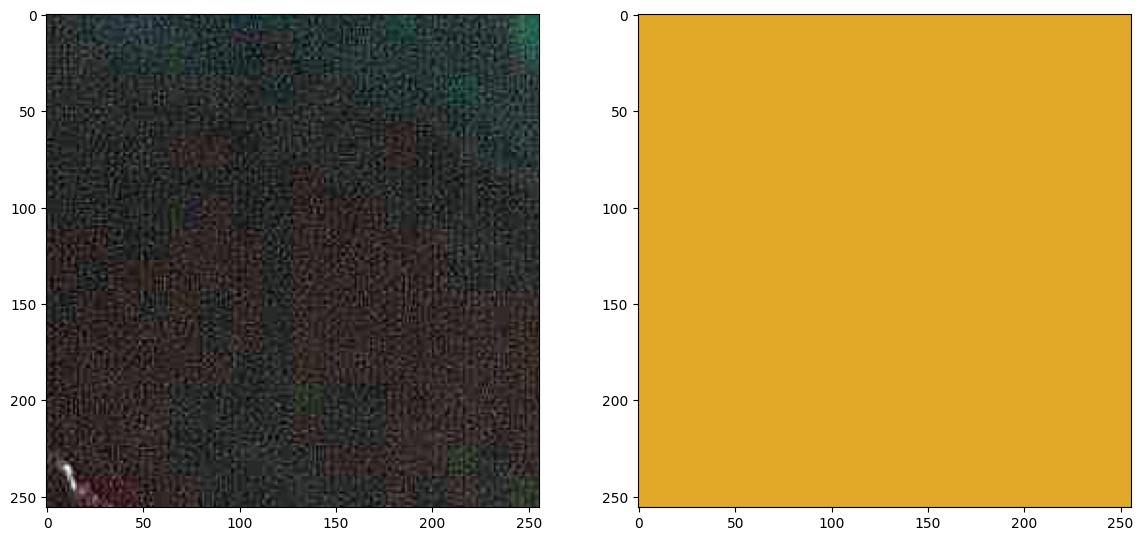

In [13]:
rand_image_id = random.randint(0, len(image_dataset))
print(rand_image_id)
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[rand_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[rand_image_id])

In [14]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building= np.array(tuple(int(class_building[i:i+2], 16) for i in (0, 2, 4)))
print(class_building)


class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land  = np.array(tuple(int(class_land[i:i+2], 16) for i in (0, 2, 4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0, 2, 4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0, 2, 4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0, 2, 4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0, 2, 4)))
print(class_unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [15]:
label = individual_patched_mask
label

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]

In [16]:
def rgb_to_label(label): 
    label_segment = np.zeros(label.shape, dtype=np.uint8)
    # print(label)
    label_segment[np.all(label == class_water, axis=-1)] = 0
    label_segment[np.all(label == class_land, axis=-1)] = 1
    label_segment[np.all(label == class_road, axis=-1)] = 2
    label_segment[np.all(label == class_building, axis=-1)] = 3
    label_segment[np.all(label == class_vegetation, axis=-1)] = 4
    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
    # print(label_segment)
    label_segment = label_segment[:,:,0]
    return label_segment 

In [17]:
print(mask_dataset.shape)

(945, 256, 256, 3)


In [18]:
labels = []
for i in range(mask_dataset.shape[0]): 
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)

In [19]:
labels = np.array(labels)
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [20]:
labels = np.expand_dims(labels, axis=3)
labels[5]

array([[[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [21]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

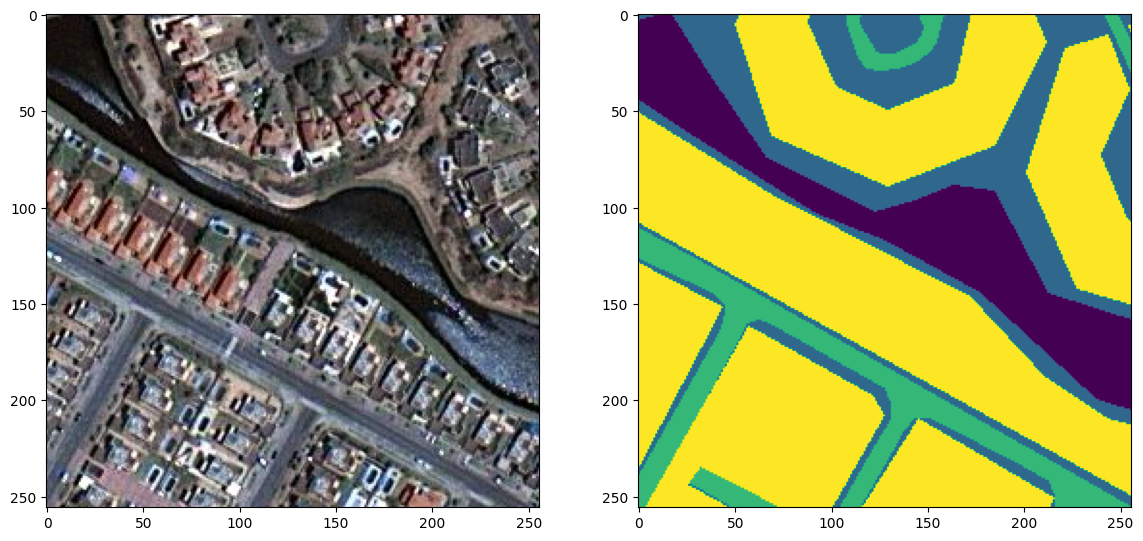

In [22]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [23]:
labels[5][:,:,0]

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [24]:
total_classes = len(np.unique(labels))

In [25]:
total_classes

6

In [26]:
from tensorflow.keras.utils import to_categorical 

2024-12-19 17:36:08.765468: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-19 17:36:09.142001: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-19 17:36:09.143332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-19 17:36:11.228152: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [27]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [28]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [29]:
master_training_dataset = image_dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [33]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [34]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [35]:
!pip install -U segmentation-models

part 2: Deep learning with sattelite imagery data

In [36]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [37]:
from keras import backend as K

In [38]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [39]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [40]:
metrics = ["accuracy", jaccard_coef]

In [41]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [42]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)

In [43]:
model = get_deep_learning_model()

In [44]:
# Please uncomment this line to get model confiuration
# model.get_config()

Generating Loss Function 

. dice loss > Focal Loss > Total Loss <br>
. Total Loss = (Dice loss + ( 1*Focal Loss))

In [45]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [46]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [47]:
dice_loss = sm.losses.DiceLoss(class_weights=weights)

In [48]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [49]:
total_loss = dice_loss + (1 * focal_loss)

Model Compilation

In [50]:
import tensorflow as tf

In [51]:
tf.keras.backend.clear_session()

In [52]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [54]:
# model_history = model.fit(X_train, y_train,
#                           batch_size=16,
#                           verbose=1,
#                           epochs=100,
#                           validation_data=(X_test, y_test),
#                           shuffle=False)

: 

In [55]:
try:
    model_history = model.fit(
        X_train, y_train,
        batch_size=8,  # Reduced batch size
        epochs=10, #Reduced Epochs for testing
        verbose=1,  # Increased verbosity
        validation_data=(X_test, y_test),
        shuffle=False #Keep shuffle false if that is your intention
    )
    print("Training completed successfully.")
except Exception as e:
    print(f"TensorFlow OutOfRangeError: {e}. Check your data loading and batch size.")
except Exception as e:
    print(f"An error occurred during training: {e}")